In [1]:
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

# Regression

## K-Nearest Neighbours

In [2]:
iris_df = sns.load_dataset('iris') 
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Question #1
Using the iris data, we're going to predict petal length based on sepal width and sepal length.

What would you guess the petal length would be for these test points?

- an iris with sepal length 4.9 and sepal width 3.2
- an iris with sepal length 5.9 and sepal width 2.7

Make a scatterplot which shows the whole dataset and the locations of the points to guess.

In [3]:
first_guess = 1.8
second_guess = 4.5

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

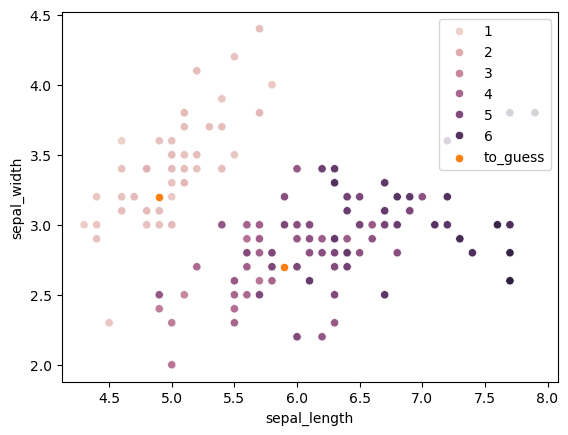

In [4]:
sns.scatterplot(
    data=iris_df,
    x = 'sepal_length',
    y='sepal_width',
    hue='petal_length',
)
to_guess_x_coords = [4.9, 5.9]
to_guess_y_coords = [3.2, 2.7]
sns.scatterplot(
    x=to_guess_x_coords, 
    y=to_guess_y_coords, 
    label='to_guess'
)

### Question #2

Recall that the two-dimensional Euclidean distance between two points with coordinates $(p_1, p_2)$ and $(q_1, q_2)$ can be written as $\sqrt{(p_1-q_1)^2+(p_2-q_2)^2}$ 

- For each of the test points, find the closest 5 points in the data set by Euclidean distance. 
- Produce a scatterplot showing these neighbours
- What is the average of their petal widths?

In [5]:
test_point = (4.9, 3.2)

iris_df['sepal_length'] - test_point[0]
iris_df[['sepal_length','sepal_width']] - test_point[0]

iris_df['euclidean_distance_from_test_point'] = ((iris_df[['sepal_length','sepal_width']] - test_point) ** 2).sum(axis=1)

In [6]:
index_of_closest_5_points = iris_df['euclidean_distance_from_test_point'].sort_values().head(5).index
neighbours = iris_df.loc[ index_of_closest_5_points ]
neighbours

,sepal_length,sepal_width,petal_length,petal_width,species,euclidean_distance_from_test_point
35,5.0,3.2,1.2,0.2,setosa,0.01
34,4.9,3.1,1.5,0.2,setosa,0.01
9,4.9,3.1,1.5,0.1,setosa,0.01
49,5.0,3.3,1.4,0.2,setosa,0.02
30,4.8,3.1,1.6,0.2,setosa,0.02


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

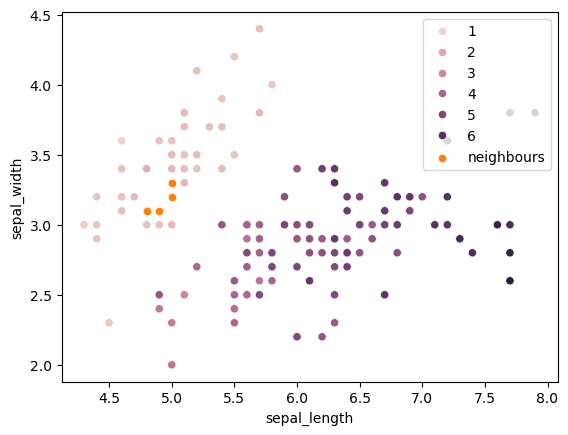

In [7]:
sns.scatterplot(
    data=iris_df,
    x='sepal_length',
    y='sepal_width',
    hue='petal_length',
)
sns.scatterplot(
    data=neighbours,
    x='sepal_length',
    y='sepal_width',
    # hue='petal_length',
    label='neighbours',
)

In [8]:
average_petal_width = neighbours['petal_width'].mean()
average_petal_width

np.float64(0.18)

### Question #3

- Fit a scikit learn K-Nearest Neighbours regressor to the data. 
- Make predictions for each point. Are the results the same to the ones you find above? 
- Why might they be different? How can you make them the same?

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
neigh = KNeighborsRegressor()

# Select the columns to use as predictor variables (as a DataFrame)
X = neighbours[['sepal_length', 'sepal_width']]
# Select the single column to use as a response variable (as a Series)
y = neighbours['petal_width']
neigh.fit( X=X, y=y,)

KNeighborsRegressor()

In [14]:
# For one point:
neigh.predict(X=[test_point])

# For both points at once:
test_data = pd.DataFrame({
    'sepal_length': [4.9, 5.9],
    'sepal_width': [3.2, 2.7]
})

predictions = neigh.predict(test_data)
predictions

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([0.18, 0.18])

### Question #4

- Split the iris data into an 80/20 test set using `sklearn.model_selection.train_test_split`. 
- Fit a kNN model on the training set using all the other variables to predict petal length. 
- Plot scatterplots to show true and predicted response variables on both the train and test sets. 
- Plot two histograms to show the prediction errors on train and test sets.

In [15]:
from sklearn.model_selection import train_test_split

In [18]:

neigh = KNeighborsRegressor()
X = iris_df[["sepal_length","sepal_width","petal_width"]]
y = iris_df['petal_length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neigh.fit(
    X=X_train,
    y=y_train,
)
y_train_hat = neigh.predict(X_train)
y_test_hat = neigh.predict(X_test)


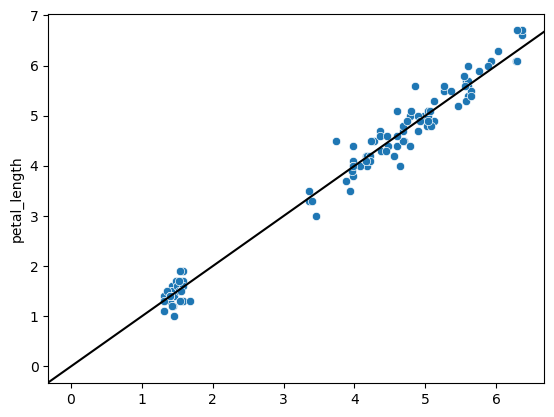

In [19]:
fig, ax = plt.subplots()
sns.scatterplot(
    x= y_train_hat,
    y= y_train
)
# Add a 45-degree line to show what perfect predictions would be
ax.axline((0, 0), slope=1, color='#000')

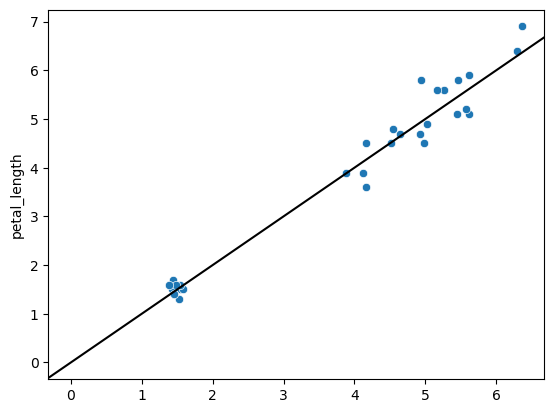

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(
    x= y_test_hat,
    y= y_test
)
# Add a 45-degree line to show what perfect predictions would be
ax.axline((0, 0), slope=1, color='#000')

### Question #5

Summarize the performance of the model on the training set using MSE. How does this compare to the test set?

What happens if you vary the proportion of the data used for training?

### Question #6
Now let's consider the hyperparameter, K. 
- What are the minimum and maximum values of K?
- Which value produces the minimum training set error for this dataset?
- What is the best value of K for this dataset?

In [ ]:
X_train.shape[0] * 0.8

In [ ]:
plot_data = iris_df[iris_df['species']=='setosa'].copy()

plot_data['sepal_width_pred_manual'] = ...

sns.scatterplot(
    data=iris_df[iris_df['species']=='setosa'],
    x = 'sepal_length',
    y='sepal_width',
)
sns.lineplot( # SOLUTION
    data=plot_data,
    x = 'sepal_length',
    y='sepal_width_pred_manual',
    label = 'prediction'
)

### Question #7

We're going to fit this linear regression model in the least-informed way possible: by trying a bunch of values of the parameters.
- Write a function which takes in the slope and intercept (beta_0 and beta_1) parameters and returns the MSE
- Loop over a range of these parameters to find the best ones (once you find the right range, you can do a more granular search)

What are the best beta_0 and beta_1 parameters you found? What's the MSE for these parameters? Plot the graph showing the points and the line you found.

### Question #8
Use the appropriate sklearn package to fit a linear regresion to these data. What are the coefficients and the MSE? How close was your initial guess? How close did you get with the grid search?

In [ ]:
from sklearn.linear_model import LinearRegression

setosa_data = iris_df[iris_df['species']=='setosa']

model = LinearRegression()
model.fit(X=setosa_data[['sepal_length']], y=setosa_data['sepal_width'])

y_hat = model.predict(setosa_data[['sepal_length']])

model.intercept_ , model.coef_

### Question #9
Let's compare linear regression and k-NN on the task of predicting sepal width from sepal length. Using a test-train split, train both models on this problem, and plot the predicted and true values on the test set.

Which model performs best? What happens to the predictions as you increase the k hyperparameter?

### Question #10
Let's add a categorical predictor to our linear regression model.
- First try to fit a model to predict sepal width using sepal length and species. What error do you get?
- Now, (incorrectly) apply ordinal encoding to the species variable (using sklearn.preprocessing.LabelEncoder), and fit the linear regression model.
- Then, using pd.get_dummies or sklearn.preprocessing.OneHotEncoder, encode species one hot, then fit the model again. Which performns better?

### Question #11
We're going to implement forward feature selection for the task of predicting petal width on the iris dataset.

- Write a function which takes in X and y variables, as well as an unfitted model. The function should split the dataset into train/test, fit a kNN model, make predictions, and return the MSE on the train and test sets. You should be able to re-use code from earlier in the lab to do this.
- Loop through all the variables in the dataset, and use your function to determine the MSE of predicting petal width using each individual feature. Which feature performs best?
- Train a model on whichever feature worked best. Repeat the process of checking the remainign features. Which feature performs best?
- Bonus: finish implementing the forward feature selection: keep track of which features have yet to be added, write a while loop which adds these features to the model. What is the order in which the features are added? Would it make sense to stop at any point?

In [ ]:
import seaborn as sns
import sklearn.preprocessing

iris_df = sns.load_dataset('iris') 
model_data = iris_df.copy()

model_data = pd.concat((
    model_data.drop('species',axis=1),
    pd.get_dummies(model_data['species'])
), axis=1)

### Question #12
Using `sklearn.feature_selection.SequentialFeatureSelector`, choose features for the petal width prediction task using kNN. Which features are selected? Do this again for a LinearRegression. Which features are selected? Is this difference expected?

### Question #13
Scikit-learn has a number of different interfaces for doing cross validation. Let's try them all out on the same problem.
- First, using `sklearn.model_selection.KFold` with 5 folds, calcualte the means of `body_mass_g` in each test fold and each train fold. Which varies the most? Why?
- In each fold, train a linear regression model on the training set and test the model on the test set, to predict `body_mass_g` using only the numeric predictors. What is the test MSE averaged across all folds?

In [ ]:
penguins_df = sns.load_dataset('penguins')
penguins_df = penguins_df[~penguins_df.isna().any(axis=1)]
penguins_df

### Question #14
- Use `cross_val_score` to perform the same task (don't forget to set the `scoring` paramter to get back mean squared errors)
- Use `cross_validate` to perform the same task. How much do the regression coefficients vary across folds?

### Question #15
Read the documentation for [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html). Which parameter(s) control the degree of regularization? What would you set to make the model equivalent to OLS linear regression? What about to a ridge regression? To a LASSO?

### Question #16

Using ElasticNetCV, train a LASSO model on the task of predicting petal width on the iris data (don't forget to first standardize the data). Which features are selected?

In [ ]:
import seaborn as sns
import sklearn.preprocessing

iris_df = sns.load_dataset('iris') 
model_data = iris_df.copy()

model_data = pd.concat((
    model_data.drop('species',axis=1),
    pd.get_dummies(model_data['species'])
), axis=1)

# Bonus

### Question #17

There are other ways to modify k-Nearest Neighbours. Normally, the model uses an unweighted mean of the response value over all of the $k$ neighbours. Can you modify these choices to make a model that performs better on the iris petal length prediction task?

### Question #18
Implement a function which takes in values of x and y, and returns the beta_0 and beta_1 coefficients for linear regression using the closed-form solutions (equation 3.4 in ISLP). How does this compare to the other ways you solved simple linear regression (manual guess, grid search, sklearn estimator)?